# Gender-Based Violence Tweet Classification

The objective of this challenge is to create a machine learning algorithm that classifies tweets about GBV into one of five categories: sexual violence, emotional violence, harmful traditional practices, physical violence and economic violence.

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

[nltk_data] Downloading package punkt to /Users/da_m1_46/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/da_m1_46/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/da_m1_46/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/da_m1_46/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [57]:
train_data = pd.read_csv('Train (1).csv')
test_data = pd.read_csv('Test (1).csv')

In [58]:
train_data

,Tweet_ID,tweet,type
0,ID_0022DWKP,Had a dream i got raped last night. By a guy i...,sexual_violence
1,ID_00395QYM,he thought the word raped means sex and told m...,sexual_violence
2,ID_003EOSSF,She NOT TALKING TO ME I WAS RAPED BY 2 MEN 1 M...,sexual_violence
3,ID_004BBHOD,I was sexually abused for 3 years at age 4 to ...,sexual_violence
4,ID_004F7516,Chessy Prout can do better by telling the trut...,sexual_violence
...,...,...,...
39645,ID_ZZTLP2L5,"ENTRY 1299: 21F. 23M, BF’s cousin. Got drunk o...",sexual_violence
39646,ID_ZZXB10M6,So you’re telling me Emmanuel Macron was groom...,sexual_violence
39647,ID_ZZY8B7FJ,"My wife regularly beats me, I get dirty slaps ...",Physical_violence
39648,ID_ZZYAFD8L,Me: Hey babe! Police officer boyfriend: is tha...,sexual_violence


In [59]:
test_data

,Tweet_ID,tweet
0,ID_0095QL4S,"because he was my boyfriend, and if I said no,..."
1,ID_00DREW5O,"lol no, I'm telling you it's not legal. It's l..."
2,ID_00E9F5X9,Somalia's semi-autonomous Puntland region has ...
3,ID_00G9OSKZ,University of Cape Coast students being robbed...
4,ID_00HU96U6,"""Somebody came up behind him and stabbed him i..."
...,...,...
15576,ID_ZZR1D21T,A Teesside charity has filed a “super complain...
15577,ID_ZZSQF54Y,he ... forced me to have sex with him.
15578,ID_ZZTN5126,Female student of medical university raped at ...
15579,ID_ZZWS0XZZ,Bokamoso Mpembe (20 months) (Kidnapped and kil...


In [60]:
print("Shape for train_data:", train_data.shape)
print("Shape for test_data:", test_data.shape)

Shape for train_data: (39650, 3)
Shape for test_data: (15581, 2)


In [61]:
train_data.describe()

,Tweet_ID,tweet,type
count,39650,39650,39650
unique,39650,39642,5
top,ID_0022DWKP,my run up today: - havent eaten in 30 hours -...,sexual_violence
freq,1,3,32648


In [62]:
test_data.describe()

,Tweet_ID,tweet
count,15581,15581
unique,15581,15568
top,ID_0095QL4S,I didn't realise I was raped by an old boyfrie...
freq,1,2


In [63]:
# total records
print("Total Records of Dataset : {}".format(len(train_data)))
print("Total Records of Dataset : {}".format(len(test_data)))

Total Records of Dataset : 39650
Total Records of Dataset : 15581


In [64]:
print("duplicates for train_data:",train_data.duplicated().sum())
print("duplicates for test_data:", test_data.duplicated().sum())

duplicates for train_data: 0
duplicates for test_data: 0


In [65]:
print("nulls for train_data:",train_data.isna().sum())
print("nulls for test_data:", test_data.isna().sum())

nulls for train_data: Tweet_ID    0
tweet       0
type        0
dtype: int64
nulls for test_data: Tweet_ID    0
tweet       0
dtype: int64


Missing Data Report of each Features : 
Tweet_ID    0
tweet       0
type        0
dtype: int64


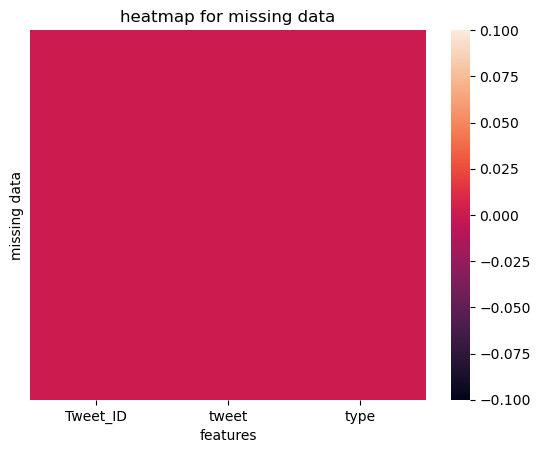

In [66]:
# missing data management
print("Missing Data Report of each Features : \n{}".format(train_data.isna().sum()))

sns.heatmap(
    train_data.isna(),
    cbar = 'viridis',
    yticklabels = False
)
plt.xlabel('features')
plt.ylabel('missing data')
plt.title('heatmap for missing data')
plt.show()
plt.close()

# Data cleaning

Convert text to lowercase

In [67]:
train_data['cleaned_tweet'] = train_data['tweet'].str.lower()
test_data['cleaned_tweet'] = test_data['tweet'].str.lower()

Remove special characters and digits

In [68]:
train_data['cleaned_tweet'] = train_data['cleaned_tweet'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
test_data['cleaned_tweet'] = test_data['cleaned_tweet'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

Tokenize the text

In [69]:
train_data['cleaned_tweet'] = train_data['cleaned_tweet'].apply(word_tokenize)
test_data['cleaned_tweet'] = test_data['cleaned_tweet'].apply(word_tokenize)

Remove stopwords

In [70]:
stop_words = set(stopwords.words('english'))
train_data['cleaned_tweet'] = train_data['cleaned_tweet'].apply(lambda x: [word for word in x if word not in stop_words])
test_data['cleaned_tweet'] = test_data['cleaned_tweet'].apply(lambda x: [word for word in x if word not in stop_words])

Lemmatize words

In [71]:
lemmatizer = WordNetLemmatizer()
train_data['cleaned_tweet'] = train_data['cleaned_tweet'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
test_data['cleaned_tweet'] = test_data['cleaned_tweet'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

Join the cleaned words to form a cleaned sentence

In [72]:
train_data['cleaned_tweet'] = train_data['cleaned_tweet'].apply(lambda x: ' '.join(x))
test_data['cleaned_tweet'] = test_data['cleaned_tweet'].apply(lambda x: ' '.join(x))

In [73]:
train_data.head()

,Tweet_ID,tweet,type,cleaned_tweet
0,ID_0022DWKP,Had a dream i got raped last night. By a guy i...,sexual_violence,dream got raped last night guy work actually g...
1,ID_00395QYM,he thought the word raped means sex and told m...,sexual_violence,thought word raped mean sex told saw dog rapin...
2,ID_003EOSSF,She NOT TALKING TO ME I WAS RAPED BY 2 MEN 1 M...,sexual_violence,talking raped 2 men 1 molested jail nother cha...
3,ID_004BBHOD,I was sexually abused for 3 years at age 4 to ...,sexual_violence,sexually abused 3 year age 4 7 one believed ra...
4,ID_004F7516,Chessy Prout can do better by telling the trut...,sexual_violence,chessy prout better telling truth selling owen...


In [74]:
test_data.head()

,Tweet_ID,tweet,cleaned_tweet
0,ID_0095QL4S,"because he was my boyfriend, and if I said no,...",boyfriend said would get mad hated sex forced ...
1,ID_00DREW5O,"lol no, I'm telling you it's not legal. It's l...",lol im telling legal literally crime conversat...
2,ID_00E9F5X9,Somalia's semi-autonomous Puntland region has ...,somalia semiautonomous puntland region taken f...
3,ID_00G9OSKZ,University of Cape Coast students being robbed...,university cape coast student robbed raped arm...
4,ID_00HU96U6,"""Somebody came up behind him and stabbed him i...",somebody came behind stabbed back really long ...


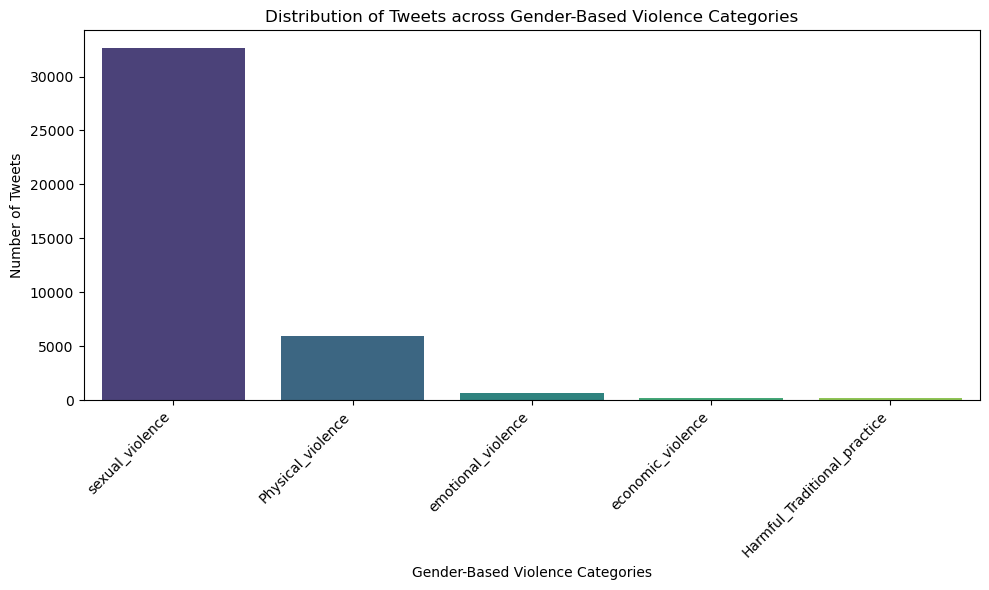

In [75]:
# Calculate the distribution of tweets across different categories
violence_distribution = train_data['type'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=violence_distribution.index, y=violence_distribution.values, palette='viridis')
plt.xlabel('Gender-Based Violence Categories')
plt.ylabel('Number of Tweets')
plt.title('Distribution of Tweets across Gender-Based Violence Categories')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/Users/da_m1_46/anaconda3/lib/python3.10/site-packages/bs4/__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


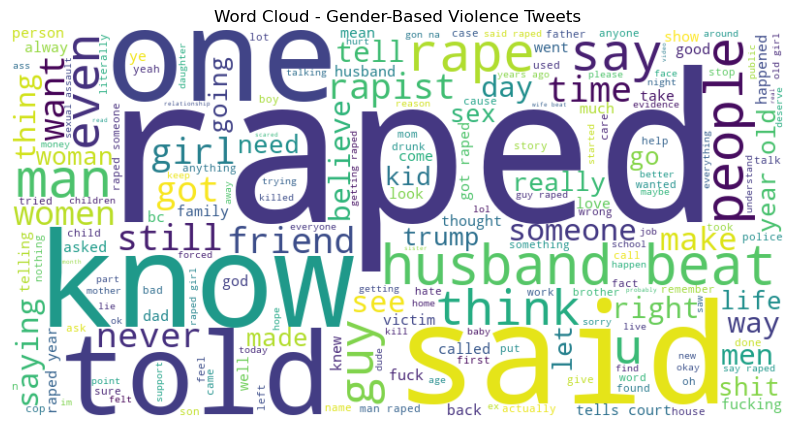

In [76]:
# Import libraries
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

# Function to preprocess text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = ' '.join(word for word in text.split() if not word.startswith('http'))
    # Remove HTML tags (if any)
    text = BeautifulSoup(text, 'html.parser').get_text()
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords and non-alphanumeric characters
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    return " ".join(tokens)

# Preprocess tweets
train_data['cleaned_tweet'] = train_data['tweet'].apply(preprocess_text)

# Combine all cleaned tweets into a single string
all_tweets = " ".join(train_data['cleaned_tweet'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tweets)

# Plot the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Gender-Based Violence Tweets')
plt.show()


## TRAINING

In [77]:
train_data = train_data.drop(columns=['tweet'])
test_data = test_data.drop(columns=['tweet'])

In [78]:
g = train_data.groupby('type')
train_data = g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True))
train_data = train_data.reset_index(drop=True)

In [79]:
train_data

,Tweet_ID,type,cleaned_tweet
0,ID_J5LQ8KN6,Harmful_Traditional_practice,female genital mutilation feel sympathy girls ...
1,ID_OR0T4KN7,Harmful_Traditional_practice,nurse poor regulation meant watch father take ...
2,ID_CUBN3JDH,Harmful_Traditional_practice,want undergo female genital mutilation may acc...
3,ID_8NIB8OIX,Harmful_Traditional_practice,read article reddit muslim egyptian women unde...
4,ID_YTPSK5MR,Harmful_Traditional_practice,posted picture comment bad 150 million women u...
...,...,...,...
935,ID_J7V82I31,sexual_violence,drunk drunk sex account forced one raped one r...
936,ID_VARFDTAZ,sexual_violence,went explain girls getting raped kidnapped lea...
937,ID_C77K1L2M,sexual_violence,supporting rape earth say raped 6 years ago bl...
938,ID_BXXHM1E6,sexual_violence,great show indeed reminded ongoing case man ra...


In [80]:
# Prepare the data for training
X_train = train_data.drop(columns=['Tweet_ID','type'])
y_train = train_data['type']

In [81]:
y_train.unique()

array(['Harmful_Traditional_practice', 'Physical_violence',
       'economic_violence', 'emotional_violence', 'sexual_violence'],
      dtype=object)

In [82]:
X_train

,cleaned_tweet
0,female genital mutilation feel sympathy girls ...
1,nurse poor regulation meant watch father take ...
2,want undergo female genital mutilation may acc...
3,read article reddit muslim egyptian women unde...
4,posted picture comment bad 150 million women u...
...,...
935,drunk drunk sex account forced one raped one r...
936,went explain girls getting raped kidnapped lea...
937,supporting rape earth say raped 6 years ago bl...
938,great show indeed reminded ongoing case man ra...


In [83]:
X_test = test_data.drop('Tweet_ID', axis=1)

In [84]:
X_test

,cleaned_tweet
0,boyfriend said would get mad hated sex forced ...
1,lol im telling legal literally crime conversat...
2,somalia semiautonomous puntland region taken f...
3,university cape coast student robbed raped arm...
4,somebody came behind stabbed back really long ...
...,...
15576,teesside charity filed super complaint alleged...
15577,forced sex
15578,female student medical university raped gunpoi...
15579,bokamoso mpembe 20 month kidnapped killed moth...


In [85]:
# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=1000)

# Vectorize the text data
X_train_vectorised = vectorizer.fit_transform(X_train['cleaned_tweet'])
X_test_vectorised = vectorizer.transform(X_test['cleaned_tweet'])


In [86]:
# # Create TF-IDF vectorizer
# vectorizer = TfidfVectorizer(max_features=1000)

# # Vectorize the text data
# X_train_vectorised = vectorizer.fit_transform(X_train['cleaned_tweet'])
# X_test_vectorised = vectorizer.transform(X_test['cleaned_tweet'])

In [87]:
print(X_train_vectorised.shape)
print(y_train.shape)

(940, 1000)
(940,)


## Random Forest Classifier

In [88]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
rf=RandomForestClassifier()
rf.fit(X_train_vectorised, y_train)

RandomForestClassifier()

In [90]:
pred_rf = rf.predict(X_train_vectorised)
pred_rf

array(['Harmful_Traditional_practice', 'Harmful_Traditional_practice',
       'Harmful_Traditional_practice', 'Harmful_Traditional_practice',
       'Harmful_Traditional_practice', 'Harmful_Traditional_practice',
       'Harmful_Traditional_practice', 'Harmful_Traditional_practice',
       'Harmful_Traditional_practice', 'Harmful_Traditional_practice',
       'Harmful_Traditional_practice', 'Harmful_Traditional_practice',
       'Harmful_Traditional_practice', 'Harmful_Traditional_practice',
       'Harmful_Traditional_practice', 'Harmful_Traditional_practice',
       'Harmful_Traditional_practice', 'Harmful_Traditional_practice',
       'Harmful_Traditional_practice', 'Harmful_Traditional_practice',
       'Harmful_Traditional_practice', 'Harmful_Traditional_practice',
       'Harmful_Traditional_practice', 'Harmful_Traditional_practice',
       'Harmful_Traditional_practice', 'Harmful_Traditional_practice',
       'Harmful_Traditional_practice', 'Harmful_Traditional_practice',
      

In [91]:
print(classification_report(y_train,pred_rf))

                              precision    recall  f1-score   support

Harmful_Traditional_practice       1.00      1.00      1.00       188
           Physical_violence       1.00      1.00      1.00       188
           economic_violence       1.00      1.00      1.00       188
          emotional_violence       1.00      1.00      1.00       188
             sexual_violence       1.00      1.00      1.00       188

                    accuracy                           1.00       940
                   macro avg       1.00      1.00      1.00       940
                weighted avg       1.00      1.00      1.00       940



In [92]:
y_test2=rf.predict(X_test_vectorised)
y_test2

array(['Harmful_Traditional_practice', 'Harmful_Traditional_practice',
       'Harmful_Traditional_practice', ..., 'sexual_violence',
       'sexual_violence', 'Harmful_Traditional_practice'], dtype=object)

In [93]:
# Create a DataFrame with customer_id and predicted income
submission = pd.DataFrame({'Tweet_ID': test_data['Tweet_ID'], 'type': y_test2})

In [94]:
submission.sample(5)

,Tweet_ID,type
2331,ID_5CPK2K3R,Harmful_Traditional_practice
8552,ID_JS88ELRV,emotional_violence
9026,ID_KW7KT42F,sexual_violence
5497,ID_CP9SAF5Z,sexual_violence
4955,ID_BD0N80KK,sexual_violence


## KNeighborsClassifier

In [95]:
from sklearn.neighbors import KNeighborsClassifier

In [96]:
# Initialize the KNN model with k=5 (you can change k as needed)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model using the vectorized train data
knn_model.fit(X_train_vectorised, y_train)

KNeighborsClassifier()

In [97]:
pred_knn = knn_model.predict(X_train_vectorised)
pred_knn

array(['Harmful_Traditional_practice', 'Harmful_Traditional_practice',
       'Harmful_Traditional_practice', 'Harmful_Traditional_practice',
       'Harmful_Traditional_practice', 'Harmful_Traditional_practice',
       'Harmful_Traditional_practice', 'Harmful_Traditional_practice',
       'Harmful_Traditional_practice', 'Harmful_Traditional_practice',
       'Harmful_Traditional_practice', 'Harmful_Traditional_practice',
       'Harmful_Traditional_practice', 'Harmful_Traditional_practice',
       'Harmful_Traditional_practice', 'Harmful_Traditional_practice',
       'Harmful_Traditional_practice', 'Harmful_Traditional_practice',
       'Harmful_Traditional_practice', 'Harmful_Traditional_practice',
       'Harmful_Traditional_practice', 'Harmful_Traditional_practice',
       'Harmful_Traditional_practice', 'Harmful_Traditional_practice',
       'Harmful_Traditional_practice', 'Harmful_Traditional_practice',
       'Harmful_Traditional_practice', 'sexual_violence',
       'Harmful_Tra

In [98]:
print(classification_report(y_train,pred_knn))

                              precision    recall  f1-score   support

Harmful_Traditional_practice       0.93      0.99      0.96       188
           Physical_violence       0.88      0.97      0.92       188
           economic_violence       0.92      0.97      0.95       188
          emotional_violence       0.93      0.93      0.93       188
             sexual_violence       0.97      0.76      0.85       188

                    accuracy                           0.92       940
                   macro avg       0.93      0.92      0.92       940
                weighted avg       0.93      0.92      0.92       940



## LogisticRegression

In [99]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_vectorised, y_train)

LogisticRegression()

In [100]:
pred_lr = knn_model.predict(X_train_vectorised)
pred_lr

array(['Harmful_Traditional_practice', 'Harmful_Traditional_practice',
       'Harmful_Traditional_practice', 'Harmful_Traditional_practice',
       'Harmful_Traditional_practice', 'Harmful_Traditional_practice',
       'Harmful_Traditional_practice', 'Harmful_Traditional_practice',
       'Harmful_Traditional_practice', 'Harmful_Traditional_practice',
       'Harmful_Traditional_practice', 'Harmful_Traditional_practice',
       'Harmful_Traditional_practice', 'Harmful_Traditional_practice',
       'Harmful_Traditional_practice', 'Harmful_Traditional_practice',
       'Harmful_Traditional_practice', 'Harmful_Traditional_practice',
       'Harmful_Traditional_practice', 'Harmful_Traditional_practice',
       'Harmful_Traditional_practice', 'Harmful_Traditional_practice',
       'Harmful_Traditional_practice', 'Harmful_Traditional_practice',
       'Harmful_Traditional_practice', 'Harmful_Traditional_practice',
       'Harmful_Traditional_practice', 'sexual_violence',
       'Harmful_Tra

In [101]:
print(classification_report(y_train,pred_lr))

                              precision    recall  f1-score   support

Harmful_Traditional_practice       0.93      0.99      0.96       188
           Physical_violence       0.88      0.97      0.92       188
           economic_violence       0.92      0.97      0.95       188
          emotional_violence       0.93      0.93      0.93       188
             sexual_violence       0.97      0.76      0.85       188

                    accuracy                           0.92       940
                   macro avg       0.93      0.92      0.92       940
                weighted avg       0.93      0.92      0.92       940



In [102]:
y_test=knn_model.predict(X_test_vectorised)

In [103]:
print(y_test)

['economic_violence' 'Harmful_Traditional_practice'
 'Harmful_Traditional_practice' ... 'Harmful_Traditional_practice'
 'sexual_violence' 'sexual_violence']


In [104]:
# Create a DataFrame with customer_id and predicted income
submission_df = pd.DataFrame({'Tweet_ID': test_data['Tweet_ID'], 'type': y_test})

In [105]:
# Save the submission file to a CSV
submission_df.to_csv('submission.csv', index=False)

In [106]:
sub = pd.read_csv('submission.csv')
sub

,Tweet_ID,type
0,ID_0095QL4S,economic_violence
1,ID_00DREW5O,Harmful_Traditional_practice
2,ID_00E9F5X9,Harmful_Traditional_practice
3,ID_00G9OSKZ,Physical_violence
4,ID_00HU96U6,sexual_violence
...,...,...
15576,ID_ZZR1D21T,Harmful_Traditional_practice
15577,ID_ZZSQF54Y,economic_violence
15578,ID_ZZTN5126,Harmful_Traditional_practice
15579,ID_ZZWS0XZZ,sexual_violence


In [107]:
import pickle

In [108]:
# Specify the file path where you want to save each model
random_forest_file = 'RandomForest.pkl'
KNeighbors_Regressor = 'KNeighbors .pkl'
Logistic_Regression = 'LogisticRegression.pkl'


# Save each model as a pickle file
try:
    with open(random_forest_file, 'wb') as file:
        pickle.dump(rf, file)
    print(f"Random Forest model saved as {random_forest_file} successfully.")

    with open(KNeighbors_Regressor, 'wb') as file:
        pickle.dump(knn_model, file)
    print(f"KNeighbors_Regressor model saved as {KNeighbors_Regressor} successfully.")
    
    with open(Logistic_Regression, 'wb') as file:
        pickle.dump(lr, file)
    print(f"Logistic_Regression model saved as {Logistic_Regression} successfully.")

except Exception as e:
    print(f"Error saving the model: {str(e)}")

Random Forest model saved as RandomForest.pkl successfully.
KNeighbors_Regressor model saved as KNeighbors .pkl successfully.
Logistic_Regression model saved as LogisticRegression.pkl successfully.


In [109]:
# Save the vectorizer as a pickle file in the same directory
vectorizer_path = 'tfidf_vectorizer.pkl'
with open(vectorizer_path, 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)

In [110]:
# # Save the model as a pickle file in the same directory
# model_path = 'trained_model.pkl'
# with open(model_path, 'wb') as model_file:
#     pickle.dump(model, model_file)